# Pricing and Hedging of European options under Black-Scholes and introduction of transaction costs 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import norm
from BlackScholes import BS
from BS_transac_costs import BS_transac_costs

In [2]:
Call = BS(100,100,1,0.2,0.05,0,"Put")

In [3]:
Call_tc = BS_transac_costs(100,100,1,0.2,0.05,0.1,0,"Put")

In [4]:
Call.pricing_BS(100,0)

array(5.57352602)

In [5]:
Call.Delta(100,0)

array(-0.36316935)

In [6]:
Call.price_trajectory('daily')

array([100.        , 100.58251756, 102.24408564, 101.91368986,
       101.01393817, 101.674804  , 104.59460254, 106.0232243 ,
       104.4037496 , 105.07486343, 107.06565471, 107.50856308,
       106.58802253, 106.47989491, 104.33697819, 103.4600101 ,
       104.51846728, 104.8675972 , 104.38146186, 103.13258301,
       100.69524416, 101.57285987, 100.79818535, 100.51262893,
       101.29013934, 102.28764931, 102.97320302, 101.57418931,
       101.63428505, 102.00273534,  99.94368775, 100.91194141,
       101.83077125, 102.45664608, 100.72639723, 100.00188997,
        99.60216824,  99.65367482, 100.10188513, 100.40282682,
       100.74477284, 101.8286619 , 100.95738604, 101.5996237 ,
       102.65283653, 100.64263217, 101.83709236, 101.61405995,
        99.09797073, 100.70887211, 102.71137375, 102.0022153 ,
       100.59151228, 100.22917372, 101.92165942, 102.29133936,
       103.13134417, 103.61021437, 105.63462943, 106.12794248,
       104.96633001, 103.17002976, 103.96035865, 104.36

In [7]:
H = Call.Hedging('hourly')
H

,Price,Option price,Delta,Buy,Depenses,Holdings,Portfolio,Error
0,100.000000,5.573526e+00,-0.363169,-0.363169,41.890461,-36.316935,5.573526,0.000000
1,99.541434,5.740968e+00,-0.371873,-0.008704,42.758263,-37.016814,5.741448,0.000481
2,99.511117,5.751175e+00,-0.372497,-0.000623,42.821693,-37.067557,5.754136,0.002961
3,99.923363,5.598130e+00,-0.364741,0.007756,42.048109,-36.446116,5.601992,0.003862
4,99.725516,5.669575e+00,-0.368520,-0.003779,42.426402,-36.750857,5.675546,0.005971
...,...,...,...,...,...,...,...,...
1508,119.834355,7.522393e-71,0.000000,0.000000,-0.059378,0.000000,-0.059378,0.059378
1509,119.642762,7.610952e-92,0.000000,0.000000,-0.059376,0.000000,-0.059376,0.059376
1510,119.540409,7.587409e-135,0.000000,0.000000,-0.059374,0.000000,-0.059374,0.059374
1511,119.909376,3.663523e-275,0.000000,0.000000,-0.059372,0.000000,-0.059372,0.059372


In [8]:
Sims = Call.MonteCarlo('daily',10000)
terminal_values = [sim[-1] for sim in Sims]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_5228/3459695329.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


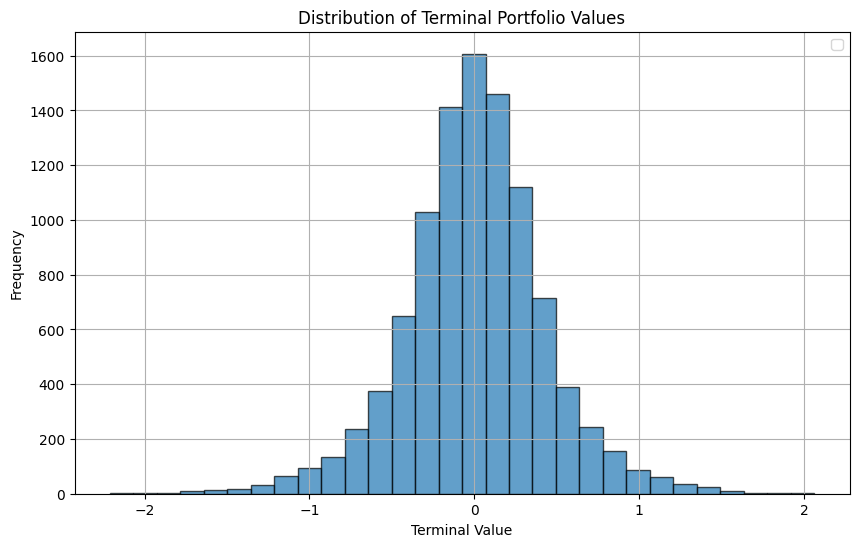

In [9]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

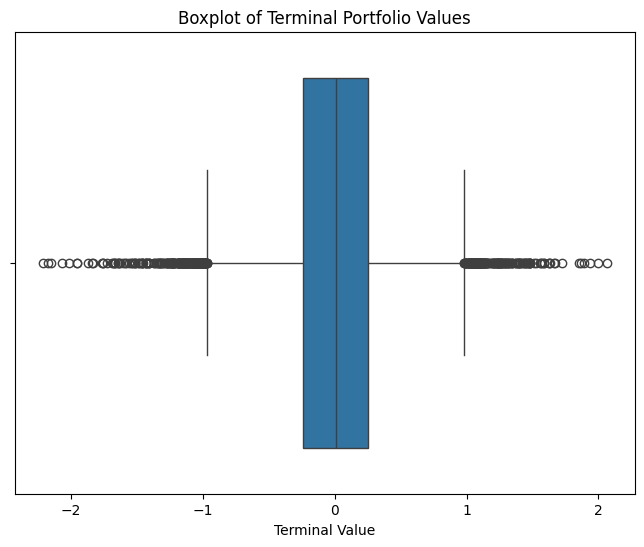

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=terminal_values)
plt.title('Boxplot of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.show()

In [11]:
mean_val = np.mean(terminal_values)
median_val = np.median(terminal_values)
std_val = np.std(terminal_values)

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")


Mean: 0.00
Median: 0.01
Standard Deviation: 0.43


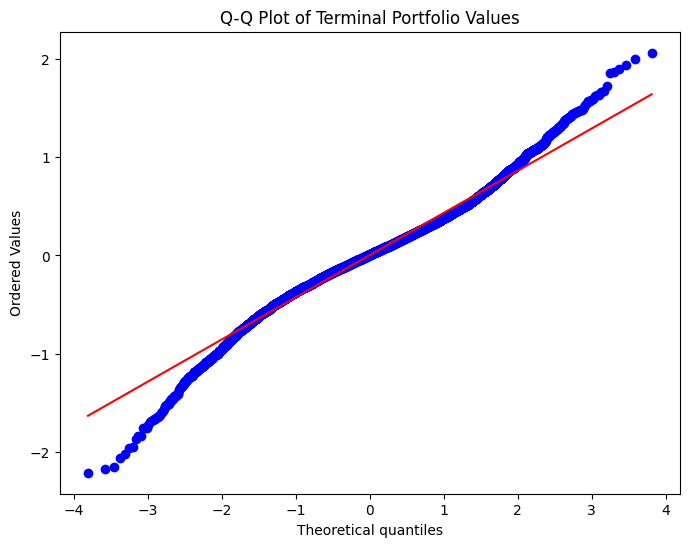

In [12]:
plt.figure(figsize=(8,6))
stats.probplot(terminal_values, dist="norm", plot=plt)
plt.title('Q-Q Plot of Terminal Portfolio Values')
plt.show()

In [13]:
normalized_values = (terminal_values - np.mean(terminal_values)) / np.std(terminal_values)
stat, p = kstest(normalized_values, 'norm')
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Kolmogorov-Smirnov Test: Statistics=0.040, p=0.000
Sample does not look Gaussian (reject H0)


# Introduction of transaction costs into Black-Scholes

In [14]:
H_tc = Call_tc.Hedging('hourly')
H_tc

,Price,Option price,Delta,Buy,Cash,Holdings,Portfolio,Error
0,100.000000,5.573526,-0.363169,-0.363169,38.258767,-36.316935,1.941833,3.631693
1,99.999598,5.572575,-0.363220,-0.000051,38.264622,-36.321888,1.942734,3.629841
2,99.999172,5.571632,-0.363272,-0.000051,38.270518,-36.326878,1.943639,3.627993
3,100.084809,5.539489,-0.361709,0.001563,38.099689,-36.201538,1.898151,3.641339
4,99.191088,5.869239,-0.378709,-0.017001,39.618619,-37.564572,2.054047,3.815192
...,...,...,...,...,...,...,...,...
1508,81.252068,18.734705,-1.000000,0.000000,-15.798914,-81.252068,-97.050982,115.785687
1509,81.109039,18.881040,-1.000000,0.000000,-15.798391,-81.109039,-96.907431,115.788471
1510,80.622194,19.371192,-1.000000,0.000000,-15.797869,-80.622194,-96.420063,115.791255
1511,80.283379,19.713314,-1.000000,0.000000,-15.797346,-80.283379,-96.080725,115.794040


In [15]:
Sims_tc = Call_tc.MonteCarlo('daily',10000)
terminal_values_tc = [sim[-1] for sim in Sims_tc]

/var/folders/3_/t8l3yh8s28z9_jbq7gqy7byr0000gn/T/ipykernel_5228/3659803437.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


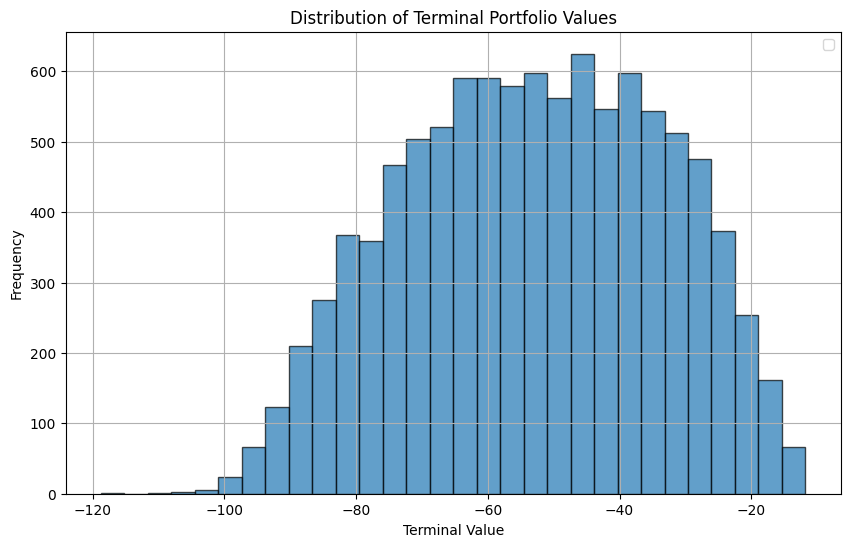

In [16]:
plt.figure(figsize=(10,6))
plt.hist(terminal_values_tc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Terminal Portfolio Values')
plt.xlabel('Terminal Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Shortcomings of the Black Scholes model

### - constant risk free rate and volatility (easily fixable)
### - no dividends from the underlying (can easily be fixed with Merton)
### - no consideration of transaction costs 
### - relies on continous adjustment in hedging (doesn't work with transaction costs)

# Leland Model